In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import csv
import sys
import math
from datetime import datetime

In [ ]:
yelp_path = '/content/drive/MyDrive/Colab Notebooks/preparation/yelp.json'
yelp_df = pd.read_json(open(yelp_path), lines=True)
yelp_df.head()

In [ ]:
yelp_df = yelp_df[yelp_df.stars >= 4.5]
yelp_df = yelp_df[yelp_df.review_count 	 >= 300]
yelp_df = yelp_df.drop(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open'], axis=1)


In [ ]:
#atts = cats = hours = []

for i, d in yelp_df.iterrows():

  '''
  if d['attributes'] != None:
    for k in d['attributes'].keys():
      yelp_df.loc[i, k] = d['attributes'].get(k)
  '''


  if d['hours'] != None:
    k = 0
    for value in d['hours'].values():
      t = value.split('-')
      passed = ((int(t[1].split(':')[0]) * 60 + int(t[1].split(':')[1])) - (int(t[0].split(':')[0]) * 60 + int(t[0].split(':')[1]))) / 60
      if passed == 0: k += 12
      else: k += passed
    yelp_df.loc[i, 'hours'] = int(k)




#yelp_df = yelp_df.drop(['attributes', 'categories'])
yelp_df = yelp_df.fillna(False)


In [ ]:
f1 = '/content/drive/MyDrive/Colab Notebooks/dataton/st.xlsx'
yelp_df.to_excel(f1)


In [ ]:
yelp_df

In [ ]:
dic1 = {}
dic2 = {}
for i, d in yelp_df.iterrows():
  for a in d['categories'].split(', '):
    if a not in dic1.keys():
      dic1[a] = 1
    else: dic1[a] += 1
  try:
    for a in d['attributes'].keys():
      if d['attributes'][a] == True:
        if a not in dic2.keys():
          dic2[a] = 1
        else: dic2[a] += 1
  except: ...
print(dict(sorted(dic1.items(), key=lambda item: item[1], reverse=True)))
print(dict(sorted(dic2.items(), key=lambda item: item[1], reverse=True)))



In [ ]:
'''from matplotlib import pyplot as plt
import seaborn as sns
df_0.groupby('categories').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)'''

In [ ]:
#inter
inter_pd = pd.read_csv(open('/content/drive/MyDrive/Colab Notebooks/dataton/inter.csv'))
inter_pd.head()

,UserId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,0,0,0,0,0
1,3146a104-ede9-4cbb-8869-b65cf60a35d0,0,2024-05-17,2,0,0,2,5,3,1,1,1,0,1,0
2,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,0,0,0,0,0
3,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,0,0,1,1,1
4,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,1,0,0,1,1


In [ ]:
#order
order_pd = pd.read_csv(open('/content/drive/MyDrive/Colab Notebooks/dataton/order.csv'))
order_pd.head()

,userId,category,avg_bill
0,2c6336a2-852b-48af-9150-9b9030387f5d,fish,432.0
1,1085e67c-3c4e-4903-b3e9-16631132c655,other,620.0
2,99792dfd-8c62-4903-92b2-a83dfd392cb1,sweets,233.0
3,ad50b3da-da8d-4b35-92c3-79cf83c2250a,fish,594.0
4,a300c8a3-6280-4a59-8c89-be4212a4eb26,fruits,0.0


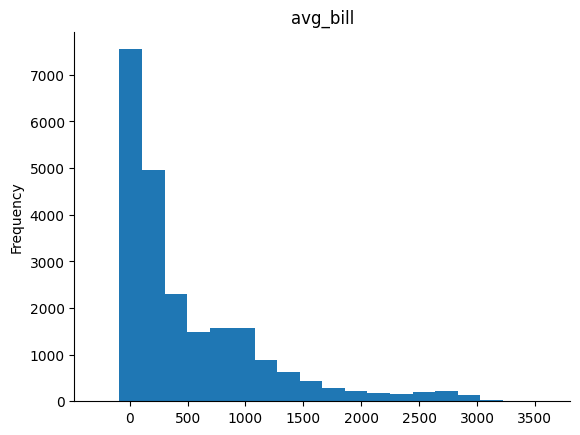

In [ ]:
# @title avg_bill

from matplotlib import pyplot as plt
order_pd['avg_bill'].plot(kind='hist', bins=20, title='avg_bill')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#user
user_pd = pd.read_csv(open('/content/drive/MyDrive/Colab Notebooks/dataton/user.csv'))
user_pd.head()

,userid,join_datetime,age,income,kids,teenagers,marital,education
0,dc9d5bd4-ec88-4546-b46c-fe9d6eaba691,2023-09-11 21:09:07,70,115443.0,0,0,divorced,bachelor
1,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters
2,d4810416-7e2a-4d1b-8440-30f39cd42aca,2022-11-14 12:31:05,13,25508.0,0,0,single,NaN
3,b56b1df3-8a67-4d61-82cf-dd9ed659bd63,2023-12-07 01:57:02,20,81139.0,0,0,single,bachelor
4,06583f0c-f0b2-4f50-add5-5f16238b33bb,2022-08-22 00:24:55,16,26121.0,0,0,single,masters


In [ ]:
f2 = '/content/drive/MyDrive/Colab Notebooks/dataton/nd.xlsx'
big_df = pd.read_csv(open('/content/drive/MyDrive/Colab Notebooks/dataton/big_df.csv'))
#big_df = big_df.dropna()
big_df = big_df.fillna(0)

'''
big_df = big_df[big_df.alcohol >= 0]
big_df = big_df[big_df.fish >= 0]
big_df = big_df[big_df.fruits >= 0]
big_df = big_df[big_df.meat >= 0]
big_df = big_df[big_df.other >= 0]
big_df = big_df[big_df.sweets >= 0]
big_df = big_df[big_df.vegetables >= 0]
big_df = big_df[big_df.discount_purchases_count_avg	 >= 0]
big_df = big_df[big_df.catalogue_purchases_count_avg >= 0]
big_df = big_df[big_df.store_purchases_count_avg >= 0]
big_df = big_df[big_df.website_purchases_count_avg >= 0]
big_df = big_df[big_df.website_visit_count_avg >= 0]
big_df = big_df[big_df.mobile_purchases_count_avg	 >= 0]
big_df = big_df[big_df.mobile_visit_count_avg >= 0]
big_df = big_df[big_df.marketing_company_outcome_1 >= 0]
big_df = big_df[big_df.marketing_company_outcome_2 >= 0]
big_df = big_df[big_df.marketing_company_outcome_3 >= 0]
big_df = big_df[big_df.marketing_company_outcome_4 >= 0]
big_df = big_df[big_df.marketing_company_outcome_5 >= 0]
big_df = big_df[big_df.age >= 0]
big_df = big_df[big_df.income >= 0]
big_df = big_df[big_df.kids >= 0]
big_df = big_df[big_df.teenagers >= 0]
'''
cnt1 = 0
cnt2 = 0
cats = ['alcohol', 'fish', 'fruits', 'meat', 'other', 'sweets', 'vegetables']
online_b = [0, 0, 0, 0, 0, 0, 0]
offline_b = [0, 0, 0, 0, 0, 0, 0]


td = datetime.now()
marital_l = []
education_l = []
for i, d in big_df.iterrows():
  if d['marital'] not in marital_l:
    marital_l.append(d['marital'])
  big_df.loc[i, 'marital'] = marital_l.index(d['marital']) + 1

  if d['education'] not in education_l and d['education'] != 0:
    education_l.append(d['education'])
  if d['education'] != 0:
    big_df.loc[i, 'education'] = education_l.index(d['education']) + 1

  da = datetime.strptime(d['join_datetime'].split(' ')[0].replace('-', '.'), '%Y.%m.%d')
  m = int((str(td - da)).split(' ')[0]) // 30
  big_df.loc[i, 'join_datetime'] = m

  if d['last_order_dt'] != 0:
    da = datetime.strptime(str(d['last_order_dt']).replace('-', '.'), '%Y.%m.%d')
    big_df.loc[i, 'last_order_dt'] = int((str(td - da)).split(' ')[0])

  if d['alcohol'] < 0:
    big_df.loc[i, 'alcohol'] = 0
  if d['fish'] < 0:
    big_df.loc[i, 'fish'] = 0
  if d['fruits'] < 0:
    big_df.loc[i, 'fruits'] = 0
  if d['meat'] < 0:
    big_df.loc[i, 'meat'] = 0
  if d['other'] < 0:
    big_df.loc[i, 'other'] = 0
  if d['sweets'] < 0:
    big_df.loc[i, 'sweets'] = 0
  if d['vegetables'] < 0:
    big_df.loc[i, 'vegetables'] = 0
  if d['discount_purchases_count_avg'] < 0:
    big_df.loc[i, 'discount_purchases_count_avg'] = 0
  if d['catalogue_purchases_count_avg'] < 0:
    big_df.loc[i, 'catalogue_purchases_count_avg'] = 0
  if d['store_purchases_count_avg'] < 0:
    big_df.loc[i, 'store_purchases_count_avg'] = 0
  if d['website_purchases_count_avg'] < 0:
    big_df.loc[i, 'website_purchases_count_avg'] = 0
  if d['website_visit_count_avg'] < 0:
    big_df.loc[i, 'website_visit_count_avg'] = 0
  if d['mobile_purchases_count_avg'] < 0:
    big_df.loc[i, 'mobile_purchases_count_avg'] = 0
  if d['mobile_visit_count_avg'] < 0:
    big_df.loc[i, 'mobile_visit_count_avg'] = 0
  if d['marketing_company_outcome_1'] < 0:
    big_df.loc[i, 'marketing_company_outcome_1'] = 0
  if d['marketing_company_outcome_2'] < 0:
    big_df.loc[i, 'marketing_company_outcome_2'] = 0
  if d['marketing_company_outcome_3'] < 0:
    big_df.loc[i, 'marketing_company_outcome_3'] = 0
  if d['marketing_company_outcome_4'] < 0:
    big_df.loc[i, 'marketing_company_outcome_4'] = 0
  if d['marketing_company_outcome_5'] < 0:
    big_df.loc[i, 'marketing_company_outcome_5'] = 0
  if d['age'] < 0:
    big_df.loc[i, 'age'] = 0
  if d['income'] < 0:
    big_df.loc[i, 'income'] = 0
  if d['kids'] < 0:
    big_df.loc[i, 'kids'] = 0
  if d['teenagers'] < 0:
    big_df.loc[i, 'teenagers'] = 0

  k = d['catalogue_purchases_count_avg'] + d['store_purchases_count_avg'] + d['website_purchases_count_avg'] + d['mobile_purchases_count_avg']
  big_df.loc[i, 'k'] = k
  big_df.loc[i, 'all'] = (d['alcohol'] + d['fish'] + d['fruits'] + d['meat'] + d['other'] + d['sweets'] + d['vegetables'])
  cnt1 += d['store_purchases_count_avg']
  cnt2 += k - cnt1



new_df = big_df.drop(['index', 'UserId', 'education', 'marital'], axis=1)
#big_df = big_df.assign(all = (big_df['alcohol'] + big_df['fish'] + big_df['fruits'] + big_df['meat'] + big_df['other'] + big_df['sweets'] + big_df['vegetables']) )
print(marital_l)
print(education_l)
new_df = new_df.astype(int)

new_df

['single', 'dating', 'divorced', 'married', 'widow']
['masters', 'phd', 'bachelor', 'basic']


,join_datetime,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,teenagers,alcohol,fish,fruits,meat,other,sweets,vegetables,k,all
0,23,1,18,3,0,1,0,1,1,13,...,0,0,0,300,126,3,232,210,2,861
1,9,0,26,1,0,0,1,8,2,4,...,0,0,54,990,108,24,344,210,3,1720
2,21,1,23,5,2,9,5,6,17,31,...,2,1293,1026,135,366,408,70,508,33,3806
3,1,2,20,1,1,8,5,2,0,0,...,1,824,1080,105,447,397,120,385,14,3358
4,2,1,12,1,1,4,2,6,18,33,...,0,683,594,480,342,137,27,1801,25,4064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,23,0,42,3,0,2,2,8,2,21,...,0,0,108,885,0,14,0,504,6,1501
3401,17,0,12,1,4,8,5,3,9,16,...,0,1140,1242,795,0,1774,200,2987,26,8138
3402,18,1,22,2,1,6,4,7,19,34,...,0,833,2160,75,342,322,72,277,30,4081
3403,25,0,12,11,5,9,8,6,0,0,...,1,1241,1185,210,0,1310,180,785,21,4911


In [ ]:
new_df[new_df.alcohol < 0]

,join_datetime,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,teenagers,alcohol,fish,fruits,meat,other,sweets,vegetables,k,all


In [ ]:
sum(new_df['all'])

11562457

In [ ]:
plt.figure(figsize=(20,16), dpi= 80)
sns.heatmap(new_df.corr(), xticklabels=new_df.corr().columns, yticklabels=new_df.corr().columns, cmap='RdPu', center=0, annot=True)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1600x1280 with 0 Axes>

In [ ]:
'''cats = ['alcohol', 'fish', 'fruits', 'meat', 'other', 'sweets', 'vegetables']
online_b = [0, 0, 0, 0, 0, 0, 0]
offline_b = [0, 0, 0, 0, 0, 0, 0]'''
#new_df['k'].mean()
cats = ['offline', 'online']
nums = [cnt1, cnt2]
plt.pie(nums, labels=cats)

In [ ]:
#online-offline most bought

people = ['Кол-во людей в Москве', 'Кол-во курьеров в Москве']
couriers = [12_712_305, 100_000]
plt.pie(couriers, labels=people)


In [ ]:
new_df.plot.scatter(x = 'income',
                    y = 'other',
                    alpha = 0.5)